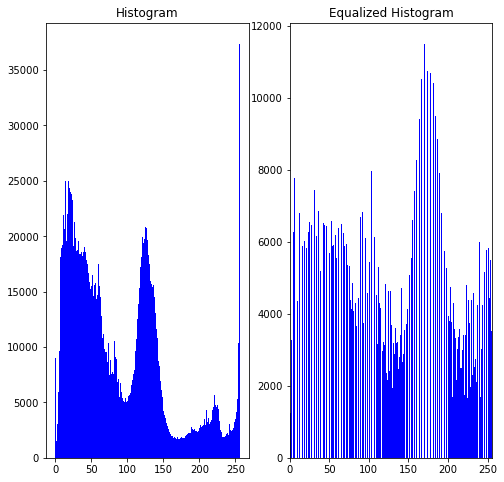

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('C:/Users/psvis/OneDrive/Pictures/Saved Pictures/Porsche.jpg')
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Histogram Display
hist,bins = np.histogram(src.flatten(),256,[0,256])
ax1.title.set_text('Histogram')
ax1.hist(src.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])

#Histogram Equalization
src = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(src)
plt.title('Equalized Histogram')
hist,bins = np.histogram(equ.flatten(),256,[0,256])
plt.hist(equ.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])

plt.show()

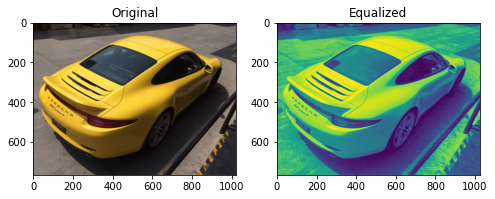

In [16]:
# Displaying Original And Histogram Equalized Images
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.title.set_text('Original')
ax1.imshow(src)
ax2.title.set_text('Equalized')
ax2.imshow(equ)
plt.show()

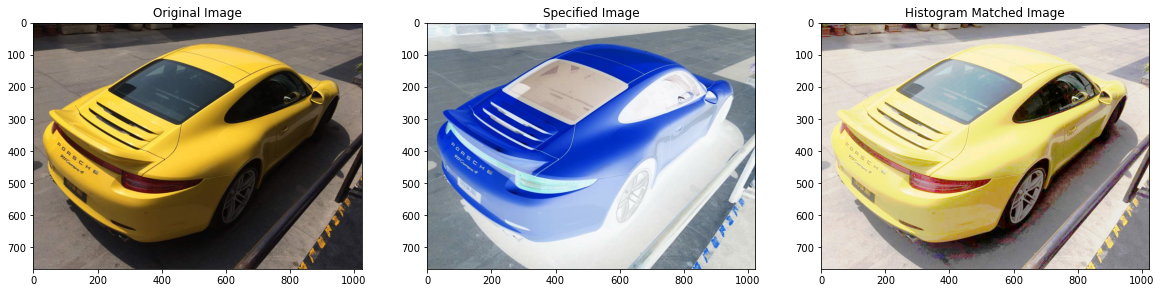

In [17]:
# Histogram Matching and Specification
def find_nearest_above(my_array,target):
    diff=my_array-target
    mask=np.ma.less_equal(diff,-1)
    if np.all(mask):
        c=np.abs(diff).argmin()
        return c
    masked_diff=np.ma.masked_array(diff,mask)
    return masked_diff.argmin()
def hist_match(original,specified):
    oldshape=original.shape
    original=original.ravel()
    specified=specified.ravel()
    s_values,bin_idx,s_counts=np.unique(original,return_inverse=True,return_counts=True)
    t_values,t_counts=np.unique(specified,return_counts=True)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
    sour=np.around(s_quantiles*255)
    temp=np.around(t_quantiles*255)
    b=[]
    for data in sour[:]:
        b.append(find_nearest_above(temp,data))
    b=np.array(b,dtype='uint8')
    return b[bin_idx].reshape(oldshape)

src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original=src
specified=255-src
a=hist_match(original,specified)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,20))
ax1.imshow(original)
ax1.set_title('Original Image')
ax2.imshow(specified)
ax2.set_title('Specified Image')
ax3.imshow(a)
ax3.set_title("Histogram Matched Image")

plt.show()